In [6]:
# How many days were US stocks straded at NYSE in 2014? 252 per holidays, etc
#
#  SPY is used as a reference since if the market traded it was open

"""Build a df in pandas"""
import pandas as pd
import os 

def test_run():
    start_date='2011-01-01'
    end_date='2011-12-31'
    dates=pd.date_range(start_date,end_date)
    
    # create an empty dataframe indexed by date
    df1=pd.DataFrame(index=dates)
    
    #read SPY data into a temp dataframe
    # assure columns are indexed by Date column
    dfSPY = pd.read_csv("data/SPY.csv", index_col="Date", 
                        parse_dates=True, usecols=['Date', 'Adj Close'],
                        na_values=['nan'])
    
#     print dfSPY.head()

    #rename 'Adj Close' column to 'SPY' to prevent clash
    dfSPY = dfSPY.rename(columns={'Adj Close': 'SPY'})
    
    # Join the two dataframes using DataFrame.join()
    # left-join performed by deault
    df1=df1.join(dfSPY, how='inner')
    
    # Read in more stocks
    symbols = ['GOOG', 'IBM', 'GLD']
    
#     with open("data/Lists/sp5002012.txt") as f:
#     symbols = [line.rstrip('\n') for line in f.readlines()]
    #print(symbols)

    for symbol in symbols:
        df_temp=pd.read_csv("data/{}.csv".format(symbol), index_col='Date',
                            parse_dates=True, usecols=['Date', 'Adj Close'],
                            na_values=['nan'])
        # rename to prevent clash
        df_temp = df_temp.rename(columns={'Adj Close': symbol})
        df1=df1.join(df_temp) # use default how='left'


    # Drop NaN Values   *the  where SPY did not trade
    df1 = df1.dropna()
    print df1.head()
    
if __name__ == '__main__':
    test_run()

               SPY    GOOG     IBM     GLD
2011-01-03  123.26  604.35  143.25  138.00
2011-01-04  123.19  602.12  143.41  134.75
2011-01-05  123.83  609.07  142.83  134.37
2011-01-06  123.59  613.50  144.40  133.83
2011-01-07  123.35  616.44  143.69  133.58


In [7]:
"""Utility function"""

import os
import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df
    
def test_run():
    # define a date range
    dates = pd.date_range('2011-01-03', '2011-12-31')
    
    # choose stock symbols to read
    with open("data/Lists/sp5002012.txt") as f:
        symbols = [line.rstrip('\n') for line in f.readlines()]
        
        #get stock data
        df = get_data(symbols, dates)
        
        #CS assignemnt data
        #df.to_csv("/Desktop/cs683_assign1_2011_adjClose_sp500data")
    
    
if __name__ == '__main__':
    test_run()

In [14]:
"""Slicing Utility function"""

# import os
# import pandas as pd

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df
    
def test_run():
    # define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31') # the year 2010
    
    # choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD', 'ROP'] # SPY will be added in get_data()
    
    #get stock data
    df = get_data(symbols, dates)
    
    #Slice by row range (dates) using DataFrame.ix[] selector
#     print df.ix['2010-01-01':'2010-01-31'] # the month of January
    
    # Slice by column (symbols)
#     print df['GOOG'] # a single label selects a column
#     print df[['IBM', 'GLD']] # a list of labels selects multiple columns
    
    #slice by row and column
    print df.ix['2010-03-10':'2010-03-15', ['SPY','IBM', 'GOOG', 'ROP']]
    
if __name__ == '__main__':
    test_run()

               SPY     IBM    GOOG    ROP
2010-03-10  109.84  120.26  576.45  56.10
2010-03-11  110.30  122.16  581.14  56.81
2010-03-12  110.31  122.48  579.54  57.20
2010-03-15  110.34  122.38  563.18  56.41


/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


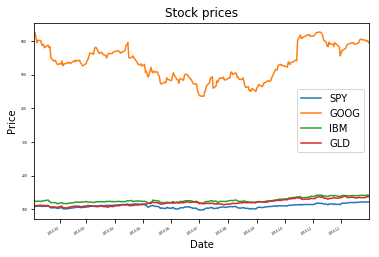

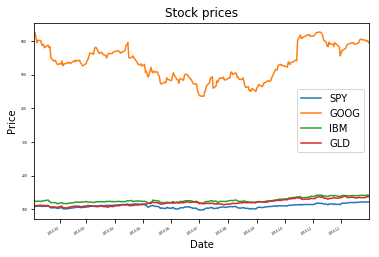

In [10]:
"""plotting Utility function"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df
    
def plot_data(df, title="Stock prices"):
    """Plot stock prices"""
    ax = df.plot(title=title, fontsize=3)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # called to show plots
   
def test_run():
    # define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31') # the year 2010
    
    # choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD'] # SPY will be added in get_data()
    
    #get stock data
    df = get_data(symbols, dates)
    
    #Slice by row range (dates) using DataFrame.ix[] selector
    #print df.ix['2010-01-01':'2010-01-31'] # the month of January
    
    # Slice by column (symbols)
    #print df['GOOG'] # a single label selects a column
    #print df[['IBM', 'GLD']] # a list of labels selects multiple columns
    
    #slice by row and column
    #print df.ix['2010-03-10':'2010-03-15', ['SPY','IBM']]
    plot_data(df)
if __name__ == '__main__':
    test_run()

/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


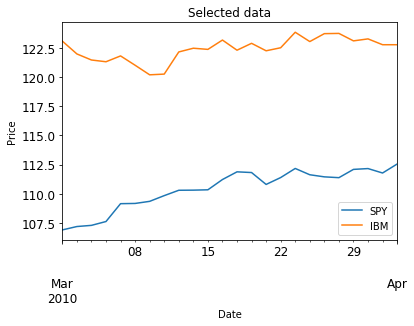

In [15]:
"""Slice and Plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
     

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df
    
def plot_data(df, title="Stock prices"):
    """Plot stock prices"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # called to show plots
   
def test_run():
    # define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31') # the year 2010
    
    # choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD'] # SPY will be added in get_data()
    
    #get stock data
    df = get_data(symbols, dates)
     
    #Slice and plot
    plot_selected(df, ['SPY', 'IBM'], '2010-03-01', '2010-04-01')
    
if __name__ == '__main__':
    test_run()

/home/jeff/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:34: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


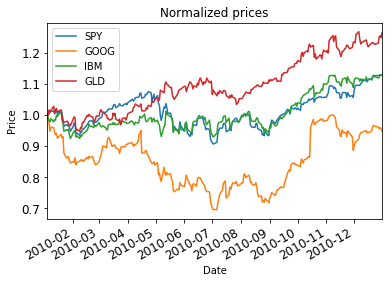

In [16]:
"""Normalize Prices and Plot"""

import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_selected(df, columns, start_index, end_index):
    """Plot the desired columns over index values in the given range"""
    plot_data(df.ix[start_index:end_index,columns], title="Selected data")
     

def symbol_to_path(symbol, base_dir="data"):
    """Return CSV file path given ticker symbol"""
    return os.path.join(base_dir, "{}.csv".format(str(symbol)))

def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files"""
    df = pd.DataFrame(index=dates)
    if 'SPY' not in symbols: # add SPY for reference, if absent
        symbols.insert(0, 'SPY')
        
    for symbol in symbols:
        df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                           parse_dates=True, usecols=['Date', 'Adj Close'], na_values=['nan'])
        df_temp = df_temp.rename(columns = {'Adj Close': symbol})
        df = df.join(df_temp) # use default how='left'
        if symbol == 'SPY': #drop dates SPY did not trade
            df = df.dropna(subset=["SPY"])
        
    return df

def normalize_data(df):
    """Normalize stock prices using the first row of the df"""
    return df / df.ix[0,:]
    
    
def plot_data(df, title="Normalized prices"):
    """Plot stock prices"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show() # called to show plots
   
def test_run():
    # define a date range
    dates = pd.date_range('2010-01-01', '2010-12-31') # the year 2010
    
    # choose stock symbols to read
    symbols = ['GOOG', 'IBM', 'GLD'] # SPY will be added in get_data()
    
    #get stock data
    df = get_data(symbols, dates)
     
    #Slice and plot
    #plot_selected(df, symbols, dates)
    plot_data(normalize_data(df))
    
if __name__ == '__main__':
    test_run()